# Try to predict score with unsupervised data (unlabeled data)

In [42]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


test_data = pd.read_csv("train_handmade.csv", sep=";").drop(columns=["name", "severity score"], axis=1)
dummies = pd.get_dummies(test_data["MLL"])
test_data = pd.concat([test_data, dummies], axis=1).drop("MLL", axis=1)
test_data

,sexe,age,general health,ease of activity,breathing problem,fatigue,overall pain,concentration,sleep quality,Alimentation,...,Fumer,Lecture,Loisirs,Manger,Medicaments,Meditation,Reflexion,Sport,Television,Yoga
0,1,75,5,3,8,8,4,3,9,0,...,0,0,0,0,0,0,0,0,0,1
1,0,59,7,7,3,3,3,6,4,1,...,0,0,0,0,0,0,0,0,0,0
2,0,50,6,5,4,4,3,7,8,0,...,0,0,0,0,0,0,0,1,0,0
3,1,25,8,8,0,1,1,10,9,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21,8,9,1,4,3,7,8,0,...,0,0,0,0,0,0,1,0,0,0
5,0,28,8,5,2,5,0,7,3,0,...,0,0,0,0,0,0,0,0,0,1
6,0,19,9,10,1,1,2,7,8,0,...,0,0,0,0,0,0,0,1,0,0
7,1,64,6,3,3,3,8,7,9,1,...,0,0,0,0,0,0,0,0,0,0
8,0,83,3,0,10,10,9,2,4,0,...,0,0,0,0,0,0,0,1,0,0
9,0,49,7,3,6,5,1,8,5,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
pca = PCA(2)
 
#Transform the data
test_data = pca.fit_transform(test_data)

In [44]:
scaler = preprocessing.MinMaxScaler()
test_data_normalized = scaler.fit_transform(test_data)

In [45]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(test_data_normalized)
    kmeanModel.fit(test_data_normalized)
    inertia.append(kmeanModel.inertia_)

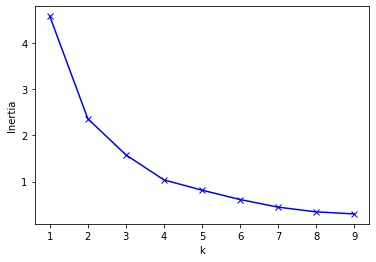

In [46]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [72]:
clusters = 5

model = KMeans(n_clusters=clusters, random_state=0)
labels = model.fit_predict(test_data)

print(labels)

[2 4 0 1 1 1 1 4 3 0 4 2 0 1 1 1 4 3 0 0 0 1 2 2 4 1 1 0 1 2]


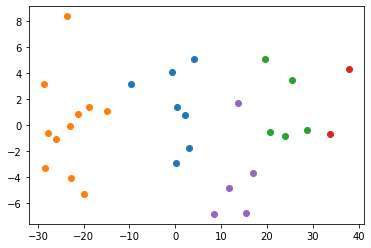

In [73]:
#Getting unique labels
u_labels = np.unique(labels)
 
#plotting the results:
for i in u_labels:
    plt.scatter(test_data[labels == i , 0] , test_data[labels == i , 1] , label = i)
plt.show()